In [1]:
import pickle
import pandas as pd
import numpy as np
import librosa
import os
from sklearn.utils import shuffle
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from scipy.io import wavfile
import IPython.display as ipd
from matplotlib import pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
classes={'backward':0,'bed':1,'bird':2,'cat':3,'dog':4,
         'down':5,'eight':6,'five':7,'follow':8,'forward':9,'four':10,
        'go':11,'happy':12,'house':13,'learn':14,'left':15,'marvin':16,
        'nine':17,'no':18,'off':19,'on':20,'one':21,'right':22,'seven':23,
         'sheila':24,'six':25,'stop':26,'three':27,'tree':28,'two':29,
         'up':30,'visual':31,'wow':32,'yes':33,'zero':34}

In [3]:
drop=0.2
model = Sequential()
model.add(Conv1D(8,17, padding='valid', activation='relu', strides=1,input_shape=(16000,1)))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(16,15, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(32, 13, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(64, 11, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Conv1D(128, 9, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Dropout(drop))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(256, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(35,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 15984, 8)          144       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5328, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5328, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5314, 16)          1936      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1771, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1771, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1759, 32)         

In [4]:
model.load_weights("model.h5")

In [5]:
arr = os.listdir('owntest')

In [6]:
acc=0
keep=[]
keep_labs=[]
for i in arr:
    num=classes[i.replace('.wav','').replace('1','')]
    print(i,num)
    sampling_rate, samples = wavfile.read('./owntest/'+i)
    res = model.predict(np.reshape(samples,(1,16000,1))).flatten()
    preds = res.argsort()[-5:][::-1]
    print('Predictions',preds)
    if preds[0]==num:
        acc+=1
    else:
        keep.append(res)
        keep_labs.append(num)
print('')
print('Accuracy', acc/len(arr))

backward.wav 0
Predictions [ 0  9 30  2 10]
backward1.wav 0
Predictions [ 0  5 23 31 30]
bed.wav 1
Predictions [17 22  1  2 18]
bed1.wav 1
Predictions [ 1  2  3 22 11]
bird.wav 2
Predictions [ 2 14 27  1 17]
bird1.wav 2
Predictions [ 2  1 22 17 11]
cat.wav 3
Predictions [ 3 33  7 15  1]
cat1.wav 3
Predictions [ 3  5 26 11  4]
dog.wav 4
Predictions [ 4  5 11  1  2]
dog1.wav 4
Predictions [ 4  5 11 18 26]
down.wav 5
Predictions [ 5  4 11 14 17]
down1.wav 5
Predictions [ 5 11  4 18  1]
eight.wav 6
Predictions [ 6 27 25  1 28]
eight1.wav 6
Predictions [ 6 27 25 22  1]
five.wav 7
Predictions [ 7 22 17 20  4]
five1.wav 7
Predictions [ 7 20 22  8 17]
follow.wav 8
Predictions [21 20  4  7  8]
follow1.wav 8
Predictions [ 8  9  7 23 10]
forward.wav 9
Predictions [ 9 10  8  0 20]
forward1.wav 9
Predictions [ 9 10  8 20  7]
four.wav 10
Predictions [10  9 19 11  8]
four1.wav 10
Predictions [10  8  9 29 11]
go.wav 11
Predictions [11  5  4 18  2]
go1.wav 11
Predictions [11  5  4 18 29]
happy.wav 12
P

In [7]:
keep_labs

[1, 8, 15, 16, 18, 24, 27, 27, 30, 32]

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

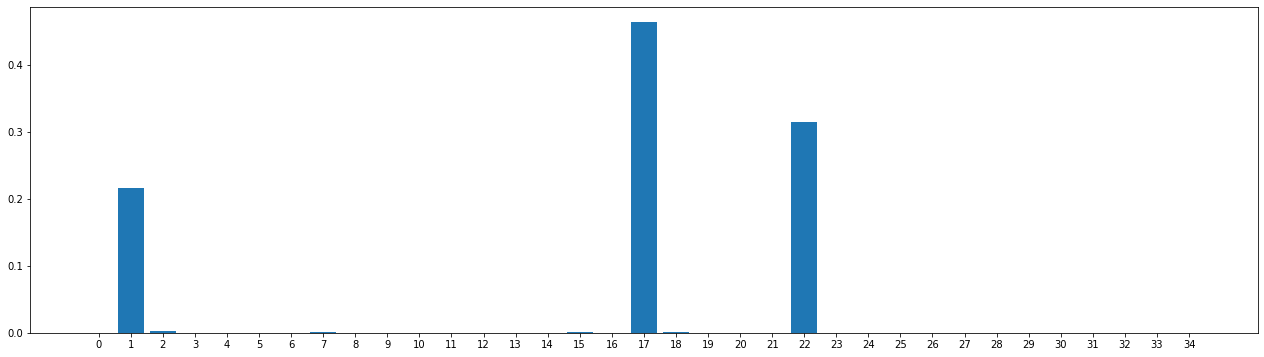

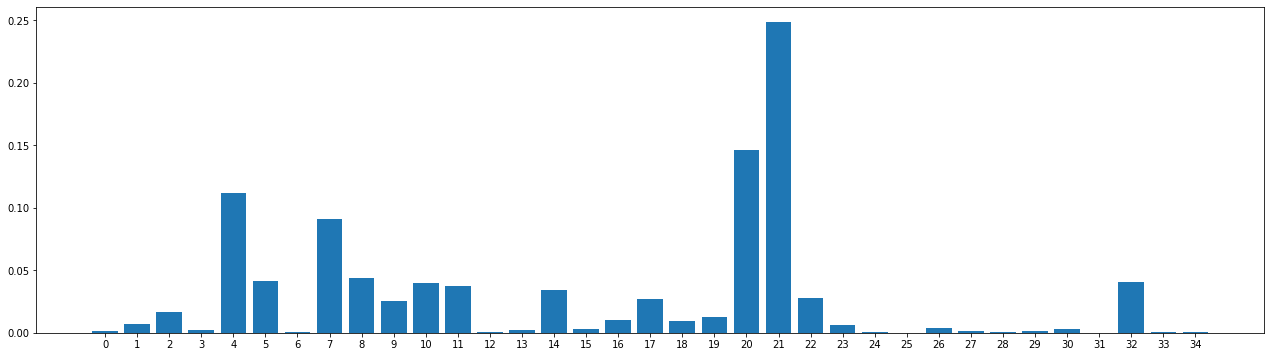

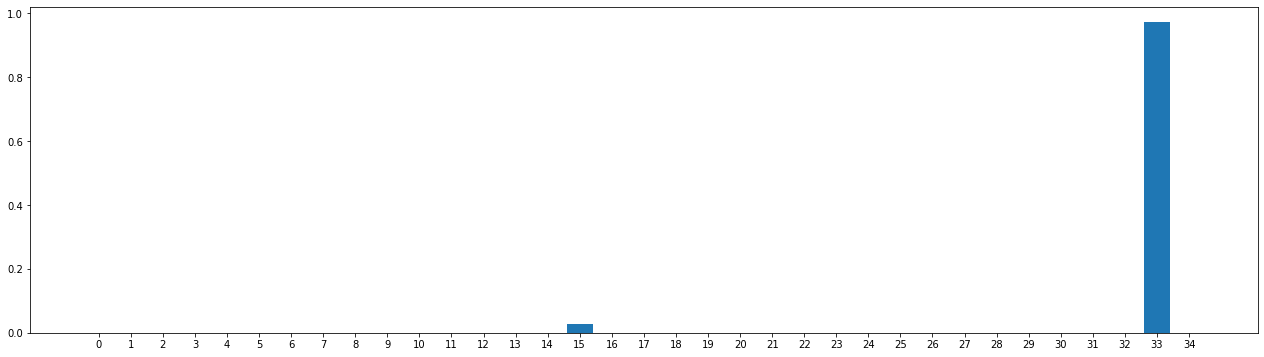

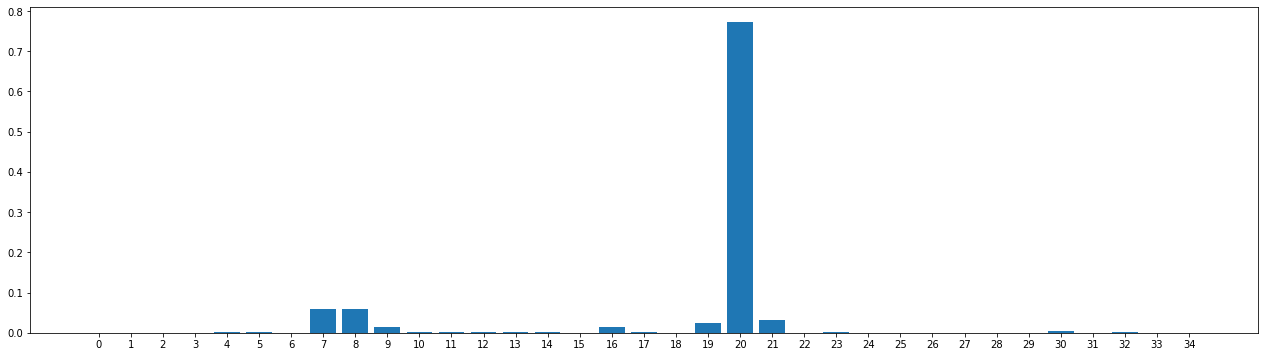

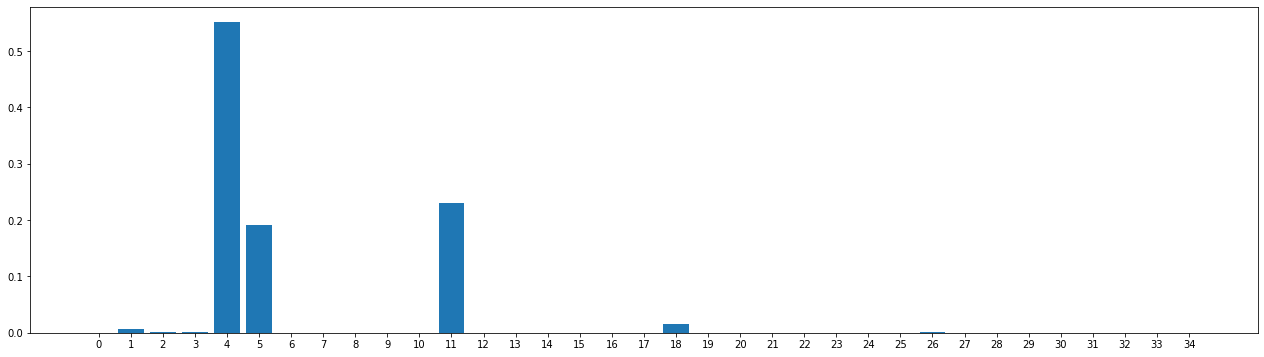

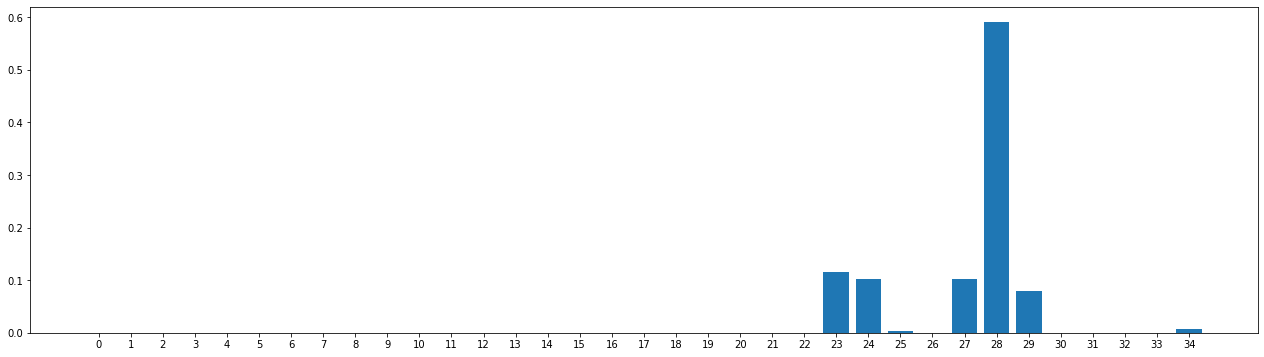

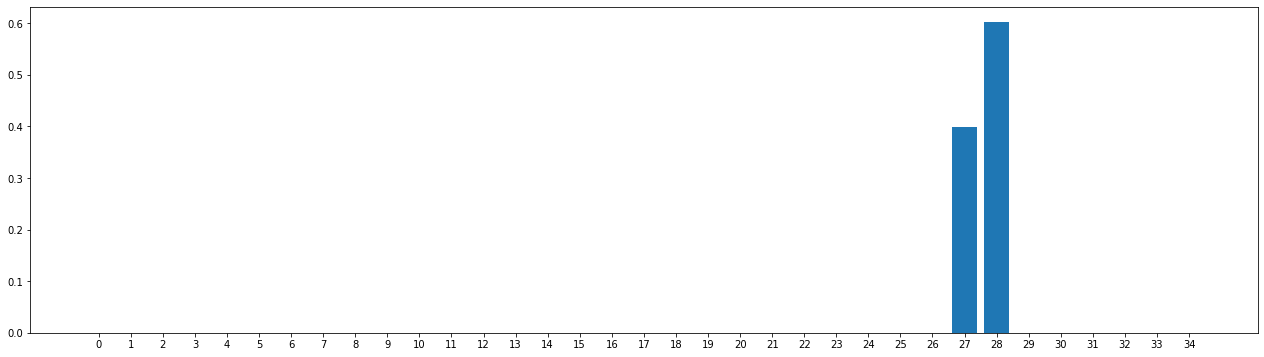

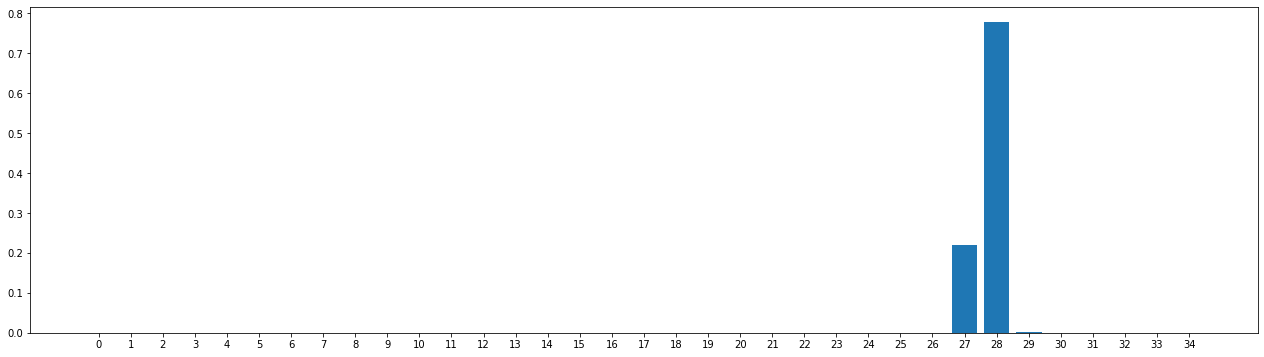

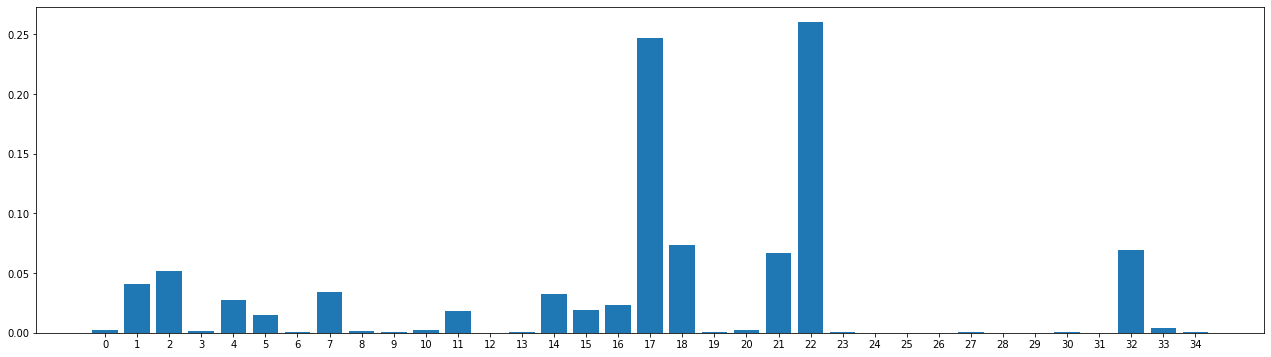

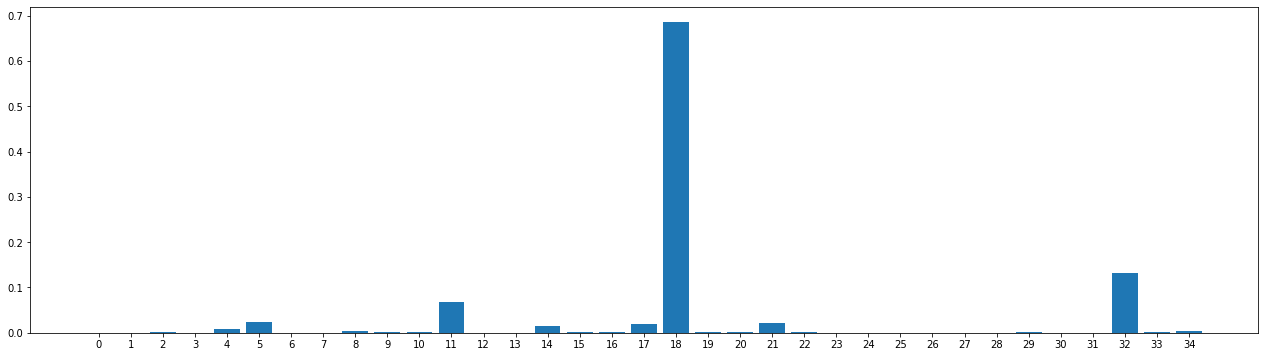

In [9]:
for i in range(len(keep)):
    figure(figsize=(22, 6))
    plt.bar(np.linspace(0,34,35),keep[i])
    plt.xticks(np.linspace(0,34,35))
    plt.show()